In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas para regresiones
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regresores
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Validacion
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

In [5]:
df = pd.read_csv("Data/MeneosCompleto.csv", delimiter=";")

pd.set_option("display.precision", 7)

df.head(3)

,Titular,Medio,URL,Enviado,Publicado,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma
0,Que arresten a los líderes de Israel por críme...,ctxt.es,https://old.meneame.net/story/arresten-lideres...,1715371648.0,1715379303.0,81,111.0,51.0,30.0,4.0,11.0,463.0
1,El pelotazo de los curas salesianos con una pi...,elsaltodiario.com,https://old.meneame.net/story/pelotazo-curas-s...,1715367709.0,1715377802.0,73,336.0,43.0,30.0,3.0,20.0,441.0
2,Países Bajos no participa en el segundo ensayo...,hoy.es,https://old.meneame.net/story/paises-bajos-no-...,1715374020.0,1715375703.0,123,1275.0,72.0,51.0,3.0,39.0,460.0


In [6]:
df.shape

(274376, 12)

In [7]:
#Empezamos eliminando duplicados
df.drop_duplicates()

,Titular,Medio,URL,Enviado,Publicado,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma
0,Que arresten a los líderes de Israel por críme...,ctxt.es,https://old.meneame.net/story/arresten-lideres...,1715371648.0,1715379303.0,81,111.0,51.0,30.0,4.0,11.0,463.0
1,El pelotazo de los curas salesianos con una pi...,elsaltodiario.com,https://old.meneame.net/story/pelotazo-curas-s...,1715367709.0,1715377802.0,73,336.0,43.0,30.0,3.0,20.0,441.0
2,Países Bajos no participa en el segundo ensayo...,hoy.es,https://old.meneame.net/story/paises-bajos-no-...,1715374020.0,1715375703.0,123,1275.0,72.0,51.0,3.0,39.0,460.0
3,Todos los israelíes están entrenados en hasbar...,reddit.com,https://old.meneame.net/story/todos-israelies-...,1715361389.0,1715375102.0,117,1256.0,69.0,48.0,5.0,24.0,410.0
4,Cuando Einstein llamó “fascistas” a los gobern...,cadtm.org,https://old.meneame.net/story/cuando-einstein-...,1715346981.0,1715373609.0,260,415.0,139.0,121.0,2.0,17.0,461.0
...,...,...,...,...,...,...,...,...,...,...,...,...
274371,Instalar Linux en iPod Mini | GPL Tarragona,gpltarragona.org,https://old.meneame.net/story/instalar-linux-e...,1133950966.0,1133953201.0,29,NaN,29.0,0.0,0.0,0.0,31.0
274372,Entrevista de El Mundo a Jose Antonio Marina,el-mundo.es,https://old.meneame.net/story/entrevista-de-el...,1133946888.0,1133951401.0,18,NaN,18.0,0.0,0.0,0.0,22.0
274373,Prova xfce 4.2.3!,xfce.org,https://old.meneame.net/story/prova-xfce-423,1133945900.0,1133947801.0,34,NaN,34.0,0.0,0.0,0.0,13.0
274374,Los 84 errores de noxtrum,pacoros.net,https://old.meneame.net/story/los-84-errores-d...,1133943563.0,1133943902.0,61,NaN,61.0,0.0,0.0,5.0,11.0


In [8]:
df.isna().sum()

Titular            3
Medio              0
URL                9
Enviado            6
Publicado          6
Meneos             0
Clicks         80698
Positivos          7
Anonimos           7
Negativos          7
Comentarios        9
Karma              7
dtype: int64

In [9]:
df.shape

(274376, 12)

In [10]:
#Eliminamos las filas con valores NaN de las columnas que no son Clicks.

lista_columnas = df.columns.to_list()
lista_columnas.remove("Clicks")

for columna in lista_columnas:
    lista_indices = df[df[columna].isna() == True].index.tolist()
    df = df.drop(index = lista_indices)

In [11]:
# Creamos la columna delay que es el tiempo que transcurre entre que se envía el meneo y se publica
df["Delay"] = df["Publicado"] - df["Enviado"]

In [14]:
# Una vez calculada esa columna, enviado y publicado no hacen falta

df = df.drop(columns=["Enviado", "Publicado"], axis=1)

In [15]:
df.head(3)

,Titular,Medio,URL,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma,Delay
0,Que arresten a los líderes de Israel por críme...,ctxt.es,https://old.meneame.net/story/arresten-lideres...,81,111.0,51.0,30.0,4.0,11.0,463.0,7655.0
1,El pelotazo de los curas salesianos con una pi...,elsaltodiario.com,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,43.0,30.0,3.0,20.0,441.0,10093.0
2,Países Bajos no participa en el segundo ensayo...,hoy.es,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,72.0,51.0,3.0,39.0,460.0,1683.0


In [16]:
df["Medio"].value_counts()

Medio
eldiario.es                    10261
youtube.com                     8239
elpais.com                      7274
publico.es                      7010
elmundo.es                      6747
                               ...  
ncov.r6.no                         1
dosmaletas.blogcindario.com        1
nbcwashington.com                  1
skamasle.com                       1
reviews.zdnet.co.uk                1
Name: count, Length: 30614, dtype: int64

In [17]:
# Eliminamos la columna medio porque la dimensionalidad es demasiado grande

df = df.drop(columns=["Medio"], axis=1)

In [20]:
# Separamos nuestro dataframe en uno de train, test y otro de predicción

df_tt = df[df["Clicks"].isna() == False]
df_tt.to_csv("Data/Datos_TrainTest.csv", index=False)

df_pred = df[df["Clicks"].isna() == True]
df_pred.to_csv("Data/Datos_Pred.csv", index=False)

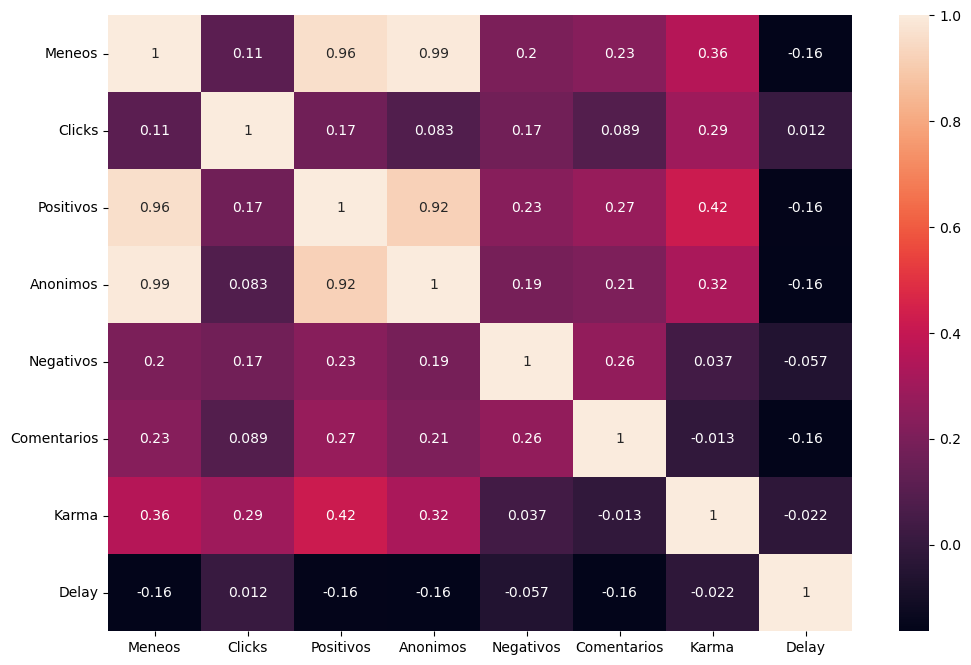

In [26]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = df_tt._get_numeric_data().corr(), annot = True)
plt.show()

In [1]:
def limpieza_datos(df):
    #Limpieza de duplicados
    df.drop_duplicates()

    #Elimina las filas con valores NaN de las columnas que no son Clicks.
    lista_columnas = df.columns.to_list()
    lista_columnas.remove("Clicks")

    for columna in lista_columnas:
        lista_indices = df[df[columna].isna() == True].index.tolist()
        df = df.drop(index = lista_indices)

    # Creamos la columna delay que es el tiempo que transcurre entre que se envía el meneo y se publica
    df["Delay"] = df["Publicado"] - df["Enviado"]

    #Eliminación de columnas innecesarias
    df = df.drop(columns=["Medio"], axis=1)
    
    # Separamos nuestro dataframe en uno de train, test y otro de predicción
    df_tt = df[df["Clicks"].isna() == False]
    df_tt.to_csv("Data/Datos_TrainTest.csv", index=False)

    df_pred = df[df["Clicks"].isna() == True]
    df_pred.to_csv("Data/Datos_Pred.csv", index=False)

## ***VISUALIZACIONES***

In [28]:
df.head()

,Titular,URL,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma,Delay
0,Que arresten a los líderes de Israel por críme...,https://old.meneame.net/story/arresten-lideres...,81,111.0,51.0,30.0,4.0,11.0,463.0,7655.0
1,El pelotazo de los curas salesianos con una pi...,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,43.0,30.0,3.0,20.0,441.0,10093.0
2,Países Bajos no participa en el segundo ensayo...,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,72.0,51.0,3.0,39.0,460.0,1683.0
3,Todos los israelíes están entrenados en hasbar...,https://old.meneame.net/story/todos-israelies-...,117,1256.0,69.0,48.0,5.0,24.0,410.0,13713.0
4,Cuando Einstein llamó “fascistas” a los gobern...,https://old.meneame.net/story/cuando-einstein-...,260,415.0,139.0,121.0,2.0,17.0,461.0,26628.0


In [29]:
df.describe()

,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma,Delay
count,274367.0000000,193671.0000000,274367.0000000,274367.0000000,274367.0000000,274367.0000000,274367.0000000,274367.0000000
mean,523.0121188,4971.9123565,213.6773081,309.3348107,4.3537269,74.3390167,513.6326891,23470.5127694
std,399.9903745,5092.3515774,117.3520980,294.7300371,8.5602412,70.1521330,164.6902817,28475.2347722
min,10.0000000,21.0000000,6.0000000,0.0000000,0.0000000,0.0000000,-11.0000000,0.0000000
25%,272.0000000,1791.0000000,137.0000000,130.0000000,0.0000000,31.0000000,386.0000000,5478.0000000
50%,410.0000000,3274.0000000,190.0000000,226.0000000,2.0000000,54.0000000,498.0000000,13541.0000000
75%,644.0000000,6256.5000000,261.0000000,395.0000000,5.0000000,93.0000000,622.0000000,30774.0000000
max,11559.0000000,294022.0000000,3315.0000000,9245.0000000,246.0000000,2718.0000000,6937.0000000,815398.0000000


## # outliers meneos

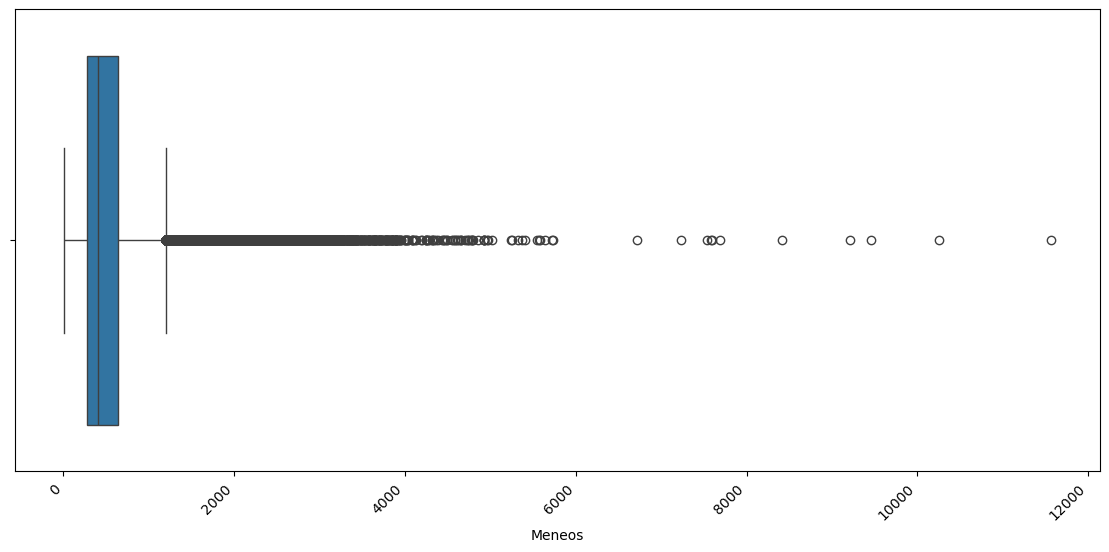

In [30]:
plt.figure(figsize = (14,6))
sns.boxplot(x=df["Meneos"])
plt.xticks(rotation=45, ha="right")

plt.show()

NameError: name 'ric' is not defined

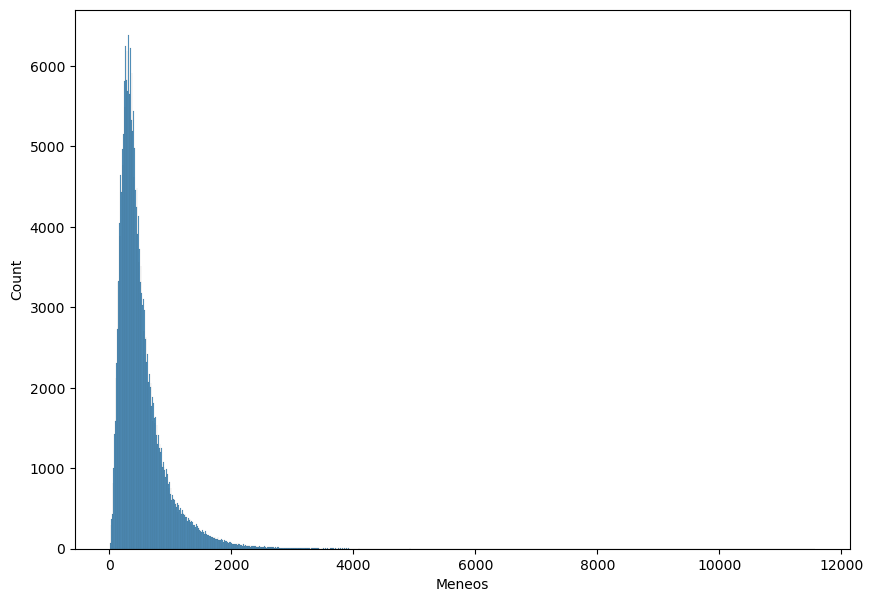

In [31]:
plt.figure(figsize = (10,7))

sns.histplot(df["Meneos"])

median_meneos = df["Meneos"].median()
q1_meneos = df["Meneos"].quantile(0.25)
q3_meneos = df["Meneos"].quantile(0.75)

ric_meneos = q3_meneos - q1_meneos

lim_l_meneos = q1_meneos - ric*1.5
lim_r_meneos = q3_meneos + ric*1.5

plt.axvline(median_meneos, color="red", linewidth=3)
plt.axvline(q1_meneos, color="magenta", linewidth=2, linestyle="--")
plt.axvline(q3_meneos, color="magenta", linewidth=2, linestyle="--")


plt.axvline(lim_l_meneos, color="black", linewidth=2, linestyle="--")
plt.axvline(lim_r_meneos, color="black", linewidth=2, linestyle="--")

plt.show()

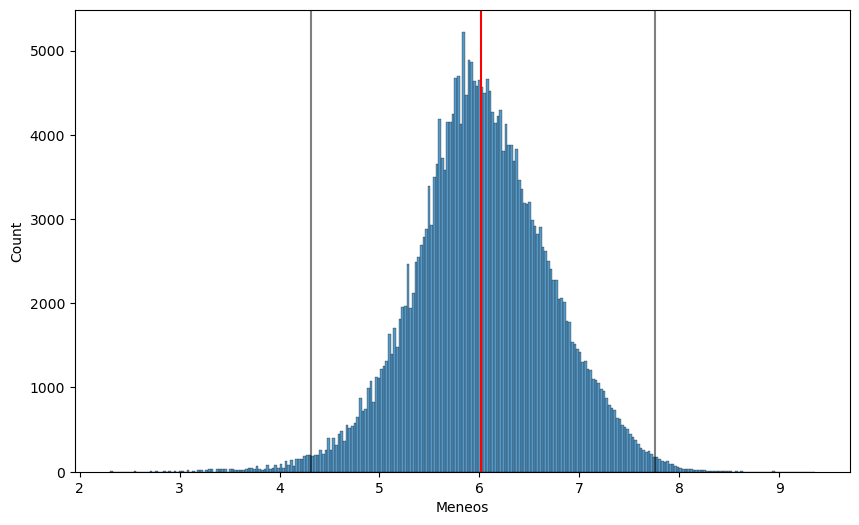

In [32]:
# Vamos a aplicar transformación logarítmica

plt.figure(figsize = (10,6))

stats = df["Meneos"].apply(np.log).describe()

median = stats["50%"]

Q1 = stats["25%"]
Q3 = stats["75%"]

ric = Q3 - Q1

lim_l = Q1 - ric*1.5
lim_r = Q3 + ric*1.5

sns.histplot(df["Meneos"].apply(np.log))

plt.axvline(median, color = "red")
plt.axvline(lim_l, color="black", alpha = 0.5)
plt.axvline(lim_r, color="black", alpha = 0.5)

plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


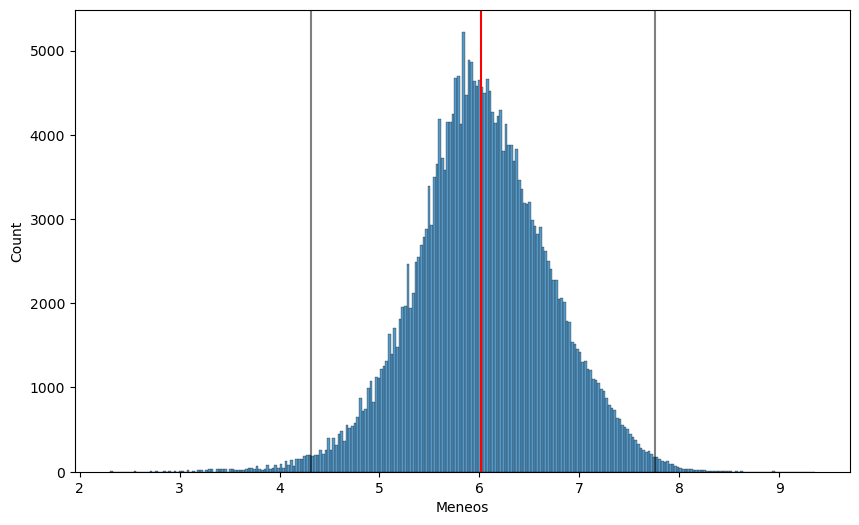

In [ ]:
# Vamos a aplicar transformación logarítmica

plt.figure(figsize = (10,6))

stats = df["Meneos"].apply(np.log).describe()

median = stats["50%"]

Q1 = stats["25%"]
Q3 = stats["75%"]

ric = Q3 - Q1

lim_l = Q1 - ric*1.5
lim_r = Q3 + ric*1.5

sns.histplot(df["Meneos"].apply(np.log))

plt.axvline(median, color = "red")
plt.axvline(lim_l, color="black", alpha = 0.5)
plt.axvline(lim_r, color="black", alpha = 0.5)

plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


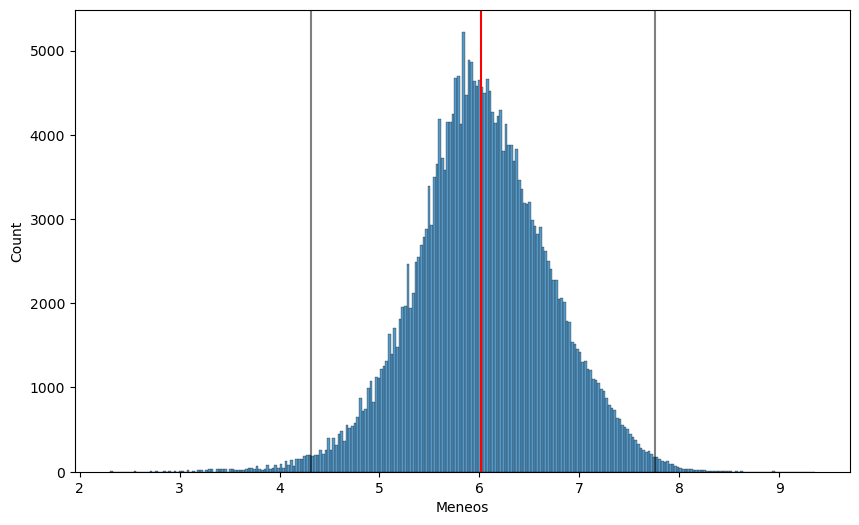

In [ ]:
# Vamos a aplicar transformación logarítmica

plt.figure(figsize = (10,6))

stats = df["Meneos"].apply(np.log).describe()

median = stats["50%"]

Q1 = stats["25%"]
Q3 = stats["75%"]

ric = Q3 - Q1

lim_l = Q1 - ric*1.5
lim_r = Q3 + ric*1.5

sns.histplot(df["Meneos"].apply(np.log))

plt.axvline(median, color = "red")
plt.axvline(lim_l, color="black", alpha = 0.5)
plt.axvline(lim_r, color="black", alpha = 0.5)

plt.show()

## # outliers Clicks

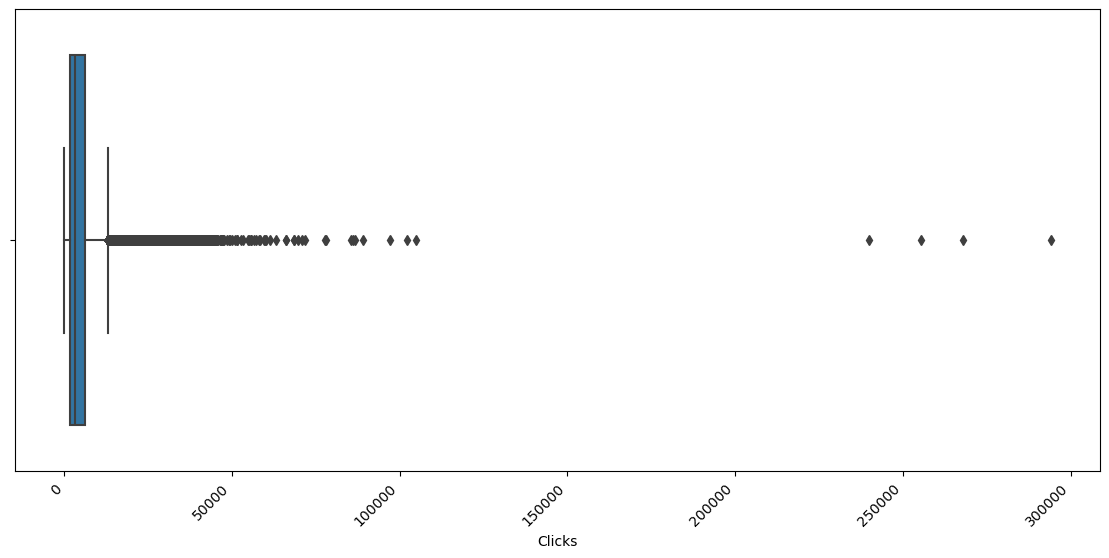

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(x=df["Clicks"])
plt.xticks(rotation=45, ha="right")

plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


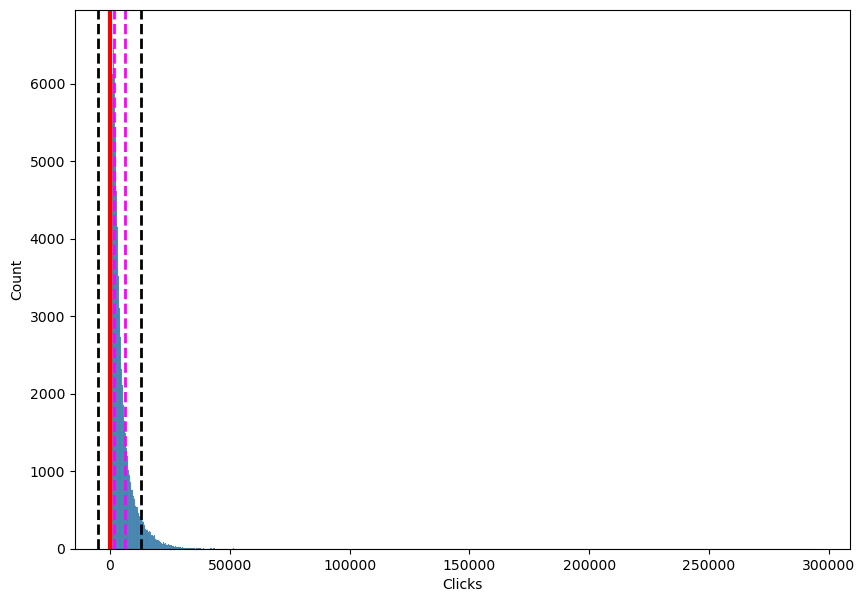

In [ ]:
plt.figure(figsize = (10,7))

sns.histplot(df["Clicks"])

median_clicks = df["Clicks"].median()
q1_clicks = df["Clicks"].quantile(0.25)
q3_clicks = df["Clicks"].quantile(0.75)

ric_clicks = q3_clicks - q1_clicks

lim_l_clicks = q1_clicks - ric_clicks*1.5
lim_r_clicks = q3_clicks + ric_clicks*1.5

plt.axvline(median, color="red", linewidth=3)
plt.axvline(q1_clicks, color="magenta", linewidth=2, linestyle="--")
plt.axvline(q3_clicks, color="magenta", linewidth=2, linestyle="--")


plt.axvline(lim_l_clicks, color="black", linewidth=2, linestyle="--")
plt.axvline(lim_r_clicks, color="black", linewidth=2, linestyle="--")

plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


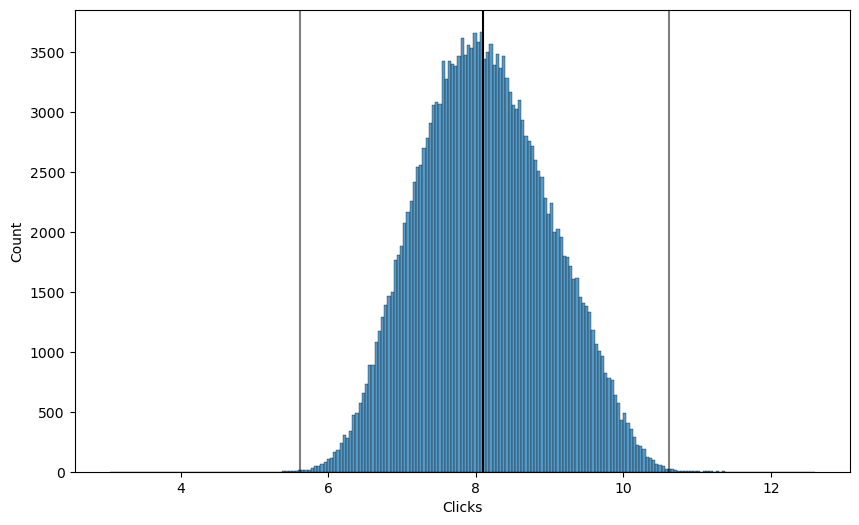

In [ ]:
# Vamos a aplicar transformación logarítmica

plt.figure(figsize = (10,6))

stats = df["Clicks"].apply(np.log).describe()

median = stats["50%"]

Q1 = stats["25%"]
Q3 = stats["75%"]

ric = Q3 - Q1

lim_l = Q1 - ric*1.5
lim_r = Q3 + ric*1.5

sns.histplot(df["Clicks"].apply(np.log))

plt.axvline(median, color = "black")
plt.axvline(lim_l, color="black", alpha = 0.5)
plt.axvline(lim_r, color="black", alpha = 0.5)

plt.show()

<Axes: xlabel='Meneos', ylabel='Clicks'>

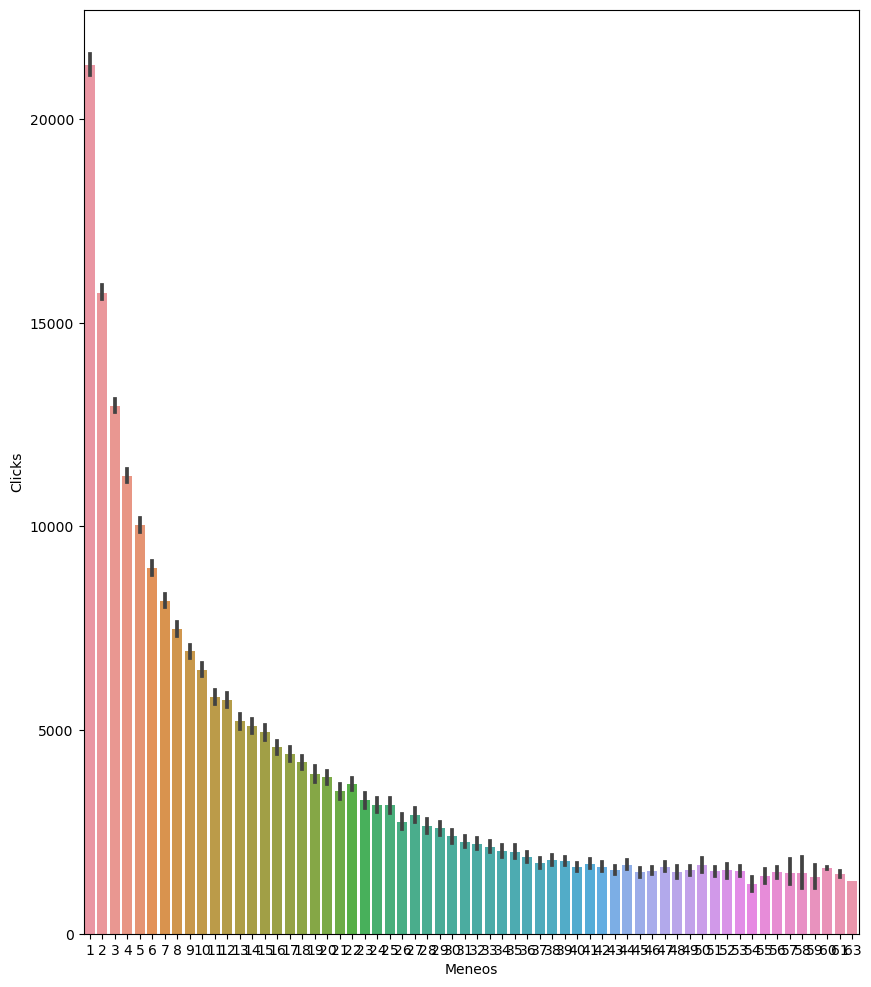

In [ ]:
plt.figure(figsize = (10,12))

df_grp = df.groupby("Clicks", as_index=False).count().sort_values("Meneos", ascending=False)

sns.barplot(y=df_grp["Clicks"], x=df_grp["Meneos"])

In [ ]:
df['Meneos'].sort_values()

50728        10
691          10
274269       10
138363       11
61920        11
          ...  
216135     8414
175069     9207
189625     9459
219101    10249
149113    11559
Name: Meneos, Length: 274367, dtype: int64

In [ ]:
media_meneos = df['Meneos'].mean()
media_meneos

523.0121188043752

In [ ]:
lim_l_meneos

270.1237298044234

In [ ]:
lim_r_meneos

645.8762701955766

In [ ]:
df['Meneos'][149113] > lim_r_meneos

True

In [ ]:
df["Rango Meneos"] = df["Meneos"].apply(rango_meneos)
df["Rango Meneos"].value_counts()

Rango Meneos
En RIC              206672
Outlier inferior     67695
Name: count, dtype: int64

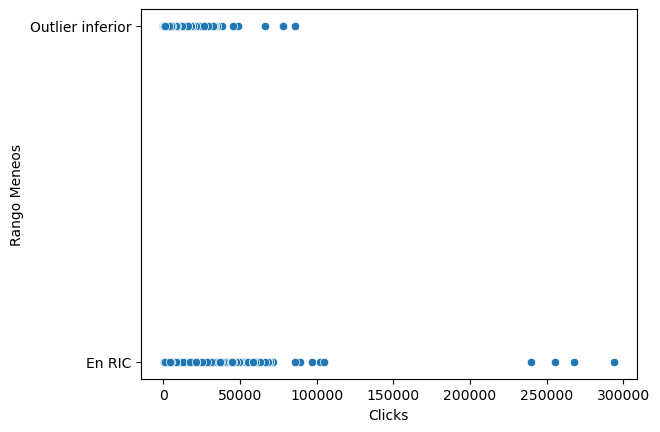

In [ ]:
sns.scatterplot(data=df, x="Clicks", y="Rango Meneos")
plt.show()

## PREPROCESAMIENTO ##

In [40]:
modelos = [LinearRegression(),
            KNeighborsRegressor(),
            RadiusNeighborsRegressor(),
            DecisionTreeRegressor(),
            RandomForestRegressor(),
            SVR(),
            AdaBoostRegressor(),
            GradientBoostingRegressor()]

In [38]:
# train, test split

X = df_tt.iloc[:, 2:].drop(["Clicks"], axis = 1)
y = df_tt[["Clicks"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.fit_transform(X_test)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.fit_transform(y_test)

datos_modelos = list()

for model in modelos:

    model.fit(X_train, y_train)
    yhat = model.predict(X_test)

    y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1))
    yhat_inv = y_scaler.inverse_transform(yhat.reshape(-1, 1))

    #Metricas
    mae = mean_absolute_error(y_test_inv, yhat_inv)
    mse = mean_squared_error(y_test_inv, yhat_inv)
    r2 = r2_score(y_test_inv, yhat_inv)

    datos_modelos.append([str(model).strip("()"), model, mae, mse, r2])

df_modelo = pd.DataFrame(data = datos_modelos, columns = ["name", "model", "mae", "mse", "r2"])

df_modelo.sort_values("r2", ascending = False)



MemoryError: 